# Conversion UT to GJD

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

In [2]:
from astropy.time import Time
from astropy.time import TimezoneInfo
import astropy.units as u

細かいことは気にしない GJDでいくし観測開始時刻でいきます  
今後図とかにするならば観測開始時刻 + exposure time/2の時間でだします? (そのときにはfits headerのJDつかえばいいのか)

In [3]:
#HST/UCT is in a format like "YYYY-MM-DD HH:MM"

In [4]:
def HSTtoUTC(HST_list):
    UTC_list=[]
    for HST in HST_list:
        hr = str(int(HST[11:13])-14).zfill(2)
        day = str(int(HST[8:10])+1).zfill(2)
        UTC_list.append(HST[:8]+day+' '+hr+HST[-3:])
    return UTC_list

def UTCtoGJD(UTC_list):
    JD_list=[]
    for UTC in UTC_list: 
        JD_list.append(Time(UTC).jd)
    return JD_list

def HSTtoGJD(HST_list):
    UTC_list = HSTtoUTC(HST_list)
    JD_list = UTCtoGJD(UTC_list)
    return JD_list

In [5]:
#example
HSTtoGJD(["2021-11-10 14:37"])

[2459529.5256944443]

# Transit Prediction

In [6]:
def phase(OBS_JD, T0, P):
    n = np.floor((OBS_JD-T0)/P)
    tr_before = T0 + n * P             #the JD of the last transit (phase=0) before the observation
    ph = (OBS_JD - tr_before)/P
    return ph

In [12]:
def phase_l(OBS_JD_list, T0, P):
    li =[]
    for OBS_JD in OBS_JD_list:
        li.append(phase(OBS_JD, T0, P))
    return li

## Parameter

In [13]:
T0_before = 2458816.697706 #previous: from NASA exoplanet archive
P_before = 2.500715

In [14]:
T0_new = 2459206.74743329
P_new = 2.50032476  #From John's updated ephemeris

## Previous IRD observation 

In [16]:
HST_past_obs=['2021-01-29 22:53', '2021-09-08 25:13', '2021-09-29 24:30', '2021-10-14 27:00',\
          '2021-10-19 23:31', '2021-10-19 27:07', \
          '2021-10-21 22:56', '2021-10-21 27:00',\
          '2021-10-26 23:39', '2021-10-26 28:25']
#2021-10-14: instrument problem
JD_past_obs=HSTtoGJD(HST_past_obs)
JD_past_obs

[2459244.8701388887,
 2459466.967361111,
 2459487.9375,
 2459503.0416666665,
 2459507.896527778,
 2459508.046527778,
 2459509.8722222224,
 2459510.0416666665,
 2459514.902083333,
 2459515.1006944445]

In [17]:
phase_past_obs=phase_l(JD_past_obs, T0_new, P_new)
phase_past_obs

[0.24710158001806168,
 0.07445144100394838,
 0.46141749614685906,
 0.502299427976005,
 0.4439916388646974,
 0.5039838455998208,
 0.2341667697137693,
 0.3019357439024085,
 0.2458498884290656,
 0.3252840141704592]

Text(0, 0.5, 'predicted RV (Normalized)')

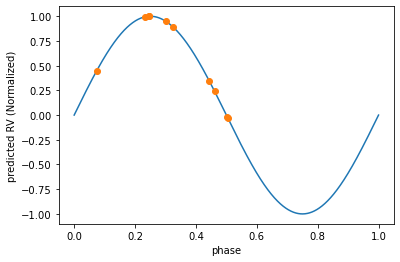

In [20]:
x = np.linspace(0, 1, 10000)
pl.plot(x, np.sin(x*2*np.pi))

pl.plot(phase_past_obs, np.sin(np.array(phase_past_obs)*2*np.pi),'o')
#pl.plot(phase_list[-1], np.sin(np.array(phase_list[-1])*2*np.pi),'o',color='r')
pl.xlabel('phase')
pl.ylabel('predicted RV (Normalized)')

In [22]:
HST_future_obs = ['2021-11-11 21:15', '2021-11-11 27:15', '2022-01-07 22:00', '2022-01-08 22:00', '2022-01-23 22:00']
JD_future_obs=HSTtoGJD(HST_future_obs)
phase_future_obs=phase_l(JD_future_obs, T0_new, P_new)

Text(0, 0.5, 'predicted RV (Normalized)')

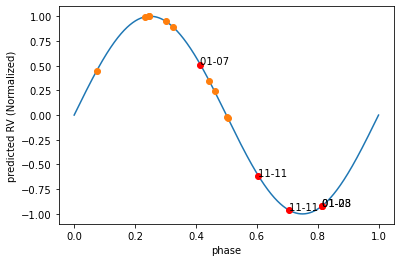

In [31]:
x = np.linspace(0, 1, 10000)
pl.plot(x, np.sin(x*2*np.pi))

pl.plot(phase_past_obs, np.sin(np.array(phase_past_obs)*2*np.pi),'o')
pl.plot(phase_future_obs, np.sin(np.array(phase_future_obs)*2*np.pi),'o', color='r')

for tag, phase in zip(HST_future_obs, phase_future_obs):
    pl.text(phase, np.sin(phase*2*np.pi), tag[5:-5])

pl.xlabel('phase')
pl.ylabel('predicted RV (Normalized)')